# 2D DC Resistivity data collection
------
* Due Date: November 5, 2025


## Objectives:
* Collect two sets of 2D resistivity data over a buried concrete slab, and an architectural wall
* Use and familiarize ourselves with two pieces of equipment: the ABEM Terrameter and the AGI SuperSting
* Plot the pseudosections for each data collection array. (We will invert the data in the next lab period).


## Background
This lab involves collection over two of the buried targets on Kafadar, the archaeological wall and the dipping concrete slab. Their approximate locations are marked in the figure below. (they should also be marked out for you before the lab).

The approximate cross-section of the archaeological wall:

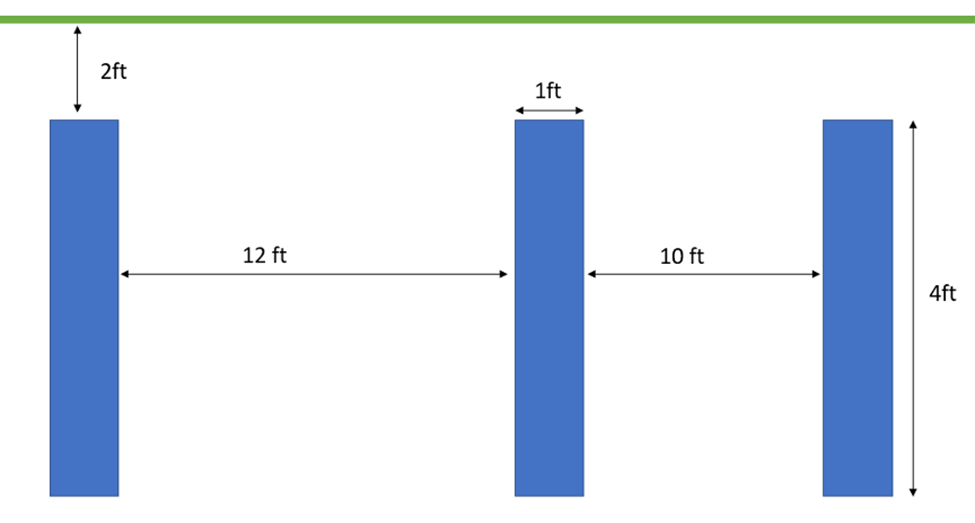

The approximate cross-section of the dipping slab:
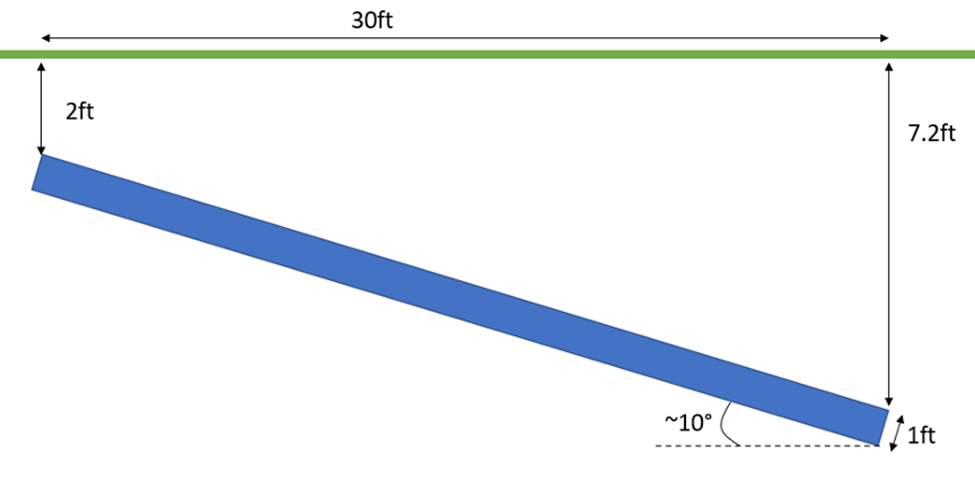

The approximate locations on Kafadar:
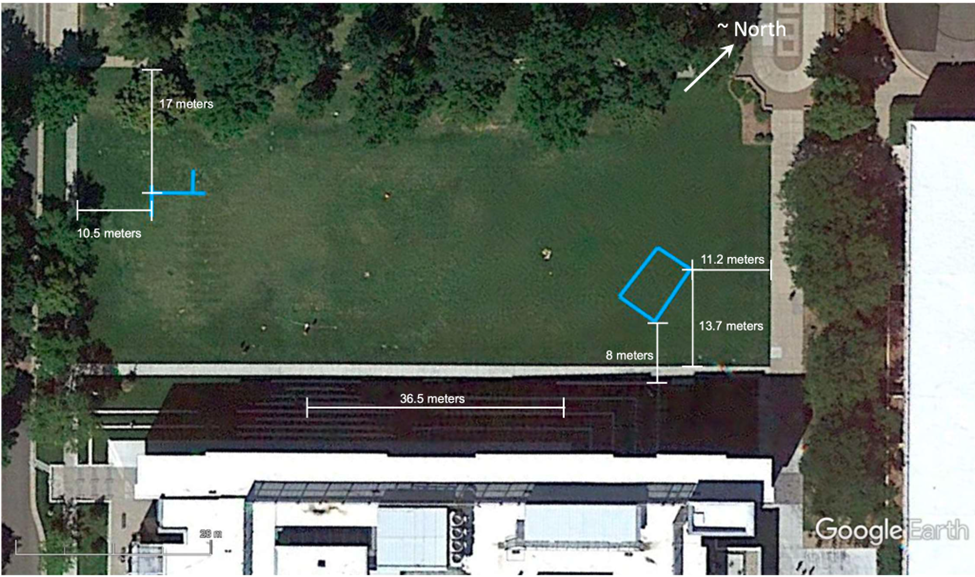

Instrumentation
We will be using two different resistivity collection machines. While the way you interact with the machines is not *exactly* the same, they way the collect data is very similar. Both machines are controlled by loaded files telling it which electrodes to use for current and which to measure potentials at. They have both been pre-loaded with the configurations we will need for today.

### Supersting R8 (Wifi)
* 56 electrode cable
* Has preloaded Wenner, and Dipole-Dipole array configuration files.
* Other pre-loaded configurations:
    * Dipole-Dipole-full, a dipole-dipole array without any expansion of the arrays, just simple dipole-dipole fully configured. This might be noisy
    * Inverse Schlumberger: While a Wenner array uses a unique combinations of ABMN electrodes, Schlumberger uses the same Potential electrodes for multiple current electrodes. Because of symmetry, you can swap the locations of the current and potential electrodes and record the same data. So the Inverse Schlumberger puts two current electrodes near each other in the center, then measures at multiple potential electrodes at the far ends of the array.
* [User Manual](https://geophysicalequipmentrental.com/files/2020/01/SuperStingManual.pdf)

### ABEM Terrameter
![ABEM](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQpKNFks6nSr7A0r3HbmVUzs1PqDwwTyrpTtg&s)

* 64 electrodes
    * Either 4 cables with 16 takeouts each, or 8 cables with 8 takeouts each.
    * We will be using 2 of the 16 takeout cables. ( You can always choose to not use all of the cables).
* You will make use of the 4x16 cable descriptions with both the Wenner array and the Dipole-Dipole array.
* [User Manual](https://www.guidelinegeo.com/wp-content/uploads/2016/03/User-Guide-Terrameter-LS-2012-10-25.pdf)

## Task:
1)	Split yourselves up into two groups, one group for each target
2)	Each group should have a team leader responsible for
    * Dividing tasks for each group (Some should be hammering in electrodes, some laying out the survey locations, getting cables setup, etc.).
3)	For each target, carry out a dipole-dipole and a Wenner survey using an appropriate electrode spacing and array length, and an appropriate orientation. (Here you are limited by the number of electrodes each instrument can support on a single cable (up to 64 for the Terrameter, 28 for the SuperSting):
    * For the orientation of the archaeological wall site try to cross as many of the potential walls as possible.
    * For the Dipping slab, you should set up the survey in a direction parallel to the long side of the slab.
5)	If you have time after running the two surveys, we will switch machines and run more surveys.
6)	For this lab, it will be sufficient to measure the GPS locations of the ends of each straight line, but for completeness let’s use a differential GPS.
7)	Download the data from the instruments and upload the to the shared drive.


Deliverables
Submit an informal report detailing:
1) Your name, lab title
2) Description of the objectives
3) Pseudosection plots for each of the data collection arrays, there should be at least 4 (a Wenner and dipole-dipole array for each target)
4) A concluding section with a cursory interpretation of your collected data.
Try to identify the horizontal locations of the targets from the pseudosections.
    * Try to  identify which direction the slab is dipping.
    * Can you tell the actual depths of these targets?
    * Are there any other sort of interesting trends in each data set that might correlate with your interpretation of the 1D sounding data from the previous lab?
5) Include the relevant pages of your lab notebook.


## Plotting psuedosections
The simplest way for you to plot psuedosections of your data will be using utilities in `SimPEG` (an open source geophysical simulation and inversion package)

This is an example reading in data from a previous year's class using the output of the ABEM data:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import simpeg.electromagnetics.static.utils as static_utils

In [ ]:
data_ex = pd.read_table(
    'data/DipoleDipole_1-2023-03-04-175030.txt',
    skiprows=98, # 98 lines worth of header information in this file
    nrows=578, # 578 total measurements
)

A = np.c_[data_ex['A(x)'],data_ex['A(z)']]  # shorthand for stacking these two arrays side by side, will be an (n_data, 2) array
B = np.c_[data_ex['B(x)'],data_ex['B(z)']]
M = np.c_[data_ex['M(x)'],data_ex['M(z)']]
N = np.c_[data_ex['N(x)'],data_ex['N(z)']]

# Create a simpeg "survey" from these locations:
# The survey will not necessarily be in the same order as the
# ABMN values you supplied, but it will helpfully also return an array you
# can use to re-arrange your data that corresponds to the survey.
survey, sort_index = static_utils.generate_survey_from_abmn_locations(
    locations_a=A, locations_b=B, locations_m=M, locations_n=N,
    data_type='volt', output_sorting=True
)

In [ ]:
norm_v = np.asarray(data_ex['R(Ohm)'])[sort_index]   # the normalized voltage collumn

In [ ]:
# can plot the normalized voltages
ax, im = static_utils.plot_pseudosection(
    survey, norm_v, cbar_label='normalized volts (V/I)',
    contourf_opts={'levels':20}
)

In [ ]:
# or even better, plot them on a log-scale!
levels = np.logspace(
    np.log10(norm_v.min()),
    np.log10(norm_v.max()),
    20
) # countour levels are spaced logarithmically
norm = mpl.colors.LogNorm()  # and use a log-normalized colormapping between data values and color.
ax, im = static_utils.plot_pseudosection(
    survey, norm_v, cbar_label='normalized volts (V/I)',
    contourf_opts={'levels':levels, 'norm':norm}
)

In [ ]:
# More relevat though are the apparent resistivities (or conductivities)
rho_app = static_utils.apparent_resistivity_from_voltage(survey, norm_v)

ax, im = static_utils.plot_pseudosection(
    survey, rho_app, cbar_label=r'Apparent Resistivity $(\Omega m)$',
    contourf_opts={'levels':20}
)

In [ ]:
# or even better again, on a log-scale
rho_app = static_utils.apparent_resistivity_from_voltage(survey, norm_v)

levels = np.logspace(
    np.log10(rho_app.min()),
    np.log10(rho_app.max()),
    20
)

norm = mpl.colors.LogNorm()

ax, im = static_utils.plot_pseudosection(
    survey, rho_app, cbar_label=r'Apparent Resistivity $(\Omega m)$',
    contourf_opts={'levels':levels, 'norm':norm}
)

### A note on color normalization:
I've shown two ways of mapping the values of the data to colors in the colormap. By default matplotlib will use a
simple linear mapping between the data values and the colors on the colormap. This works well when the data your plotting vary on a linear scale.

But generally resistivity data varies by several orders of magnitude, and the relative difference between two values is what is important. For example, the difference in resistivity between a 1E-2 $\Omega m$ value and a 1 $\Omega m$ value has just as much impact on our data as the difference between 1E-4 $\Omega m$ and 1E-2 $\Omega m$.

Thus you will almost always see resistivity(conductivity) plotted on logarithmic colorscales. This can either be done by transforming the data using `np.log10(data)` before plotting it, or (and this is my recommended pathway) by using a `matplotlib.colors.LogNorm()` color normalizer, because it naturally makes the labeled values on the colormap consistent with the data.